# Problem Statement:
Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.

In most cases, customers get to know of such unauthorised transactions happening through their cards quite late as they are unaware of such ongoing credit card frauds or they do not monitor their bank account activities closely. This has led to late complaint registration with Finex and by the time the case is flagged fraudulent, the bank incurs heavy losses and ends up paying the lost amount to the cardholders.

Now, Finex is also not really equipped with the latest financial technologies, and it is becoming difficult for the bank to track these data breaches on time to prevent further losses. The Branch Manager is worried about the ongoing situation and wants to identify the possible root causes and action areas to come up with a long-term solution that would help the bank generate high revenue with minimal losses.



# Steps to be performed:
1. Data Understanding
2. Exploratory Data Analyses (EDA)
3. Train-Validation split
4. Model building and evaluation
5. Business impact

# 1. Data Understanding

In [1]:
# importing necessary libraries for data loading and EDA
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
# Loading the train data
df_train = pd.read_csv(r'dataset\fraudTrain.csv')

# check
df_train.head()

Unnamed: 0 trans_date_trans_time            cc_num   
0           0   2019-01-01 00:00:18  2703186189652095  \
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first   
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer  \
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long   
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781  \
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob   
0      3495          Psychologist, counselling  1988-03-09  \
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long   
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315  \
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [3]:
# check the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

`Inferences:`<br>
1. The given data does not contain any missing values.
2. First column is redundant and have to be removed.
3. Since this data is at transaction level, check whether the `trans_num` column is unique (with no duplicates) or not.
4. Convert `trans_date_trans_time` and `dob` into pandas date-time format.

`Note:` Unix time is currently defined as the number of seconds which have passed since 00:00:00 UTC on Thursday, 1 January 1970, which is referred to as the Unix epoch. Unix time is typically encoded as a signed integer.The Unix time 0 is exactly midnight UTC on 1 January 1970, with Unix time incrementing by 1 for every non-leap second after this.<br>
For example, 00:00:00 UTC on 1 January 1971 is represented in Unix time as 31536000. Negative values indicate times before the Unix epoch, with the value decreasing by 1 for every non-leap second before the epoch. For example, 00:00:00 UTC on 1 January 1969 is represented in Unix time as −31536000. <br>
Every day in Unix time consists of exactly 86400 seconds.Unix time is sometimes referred to as Epoch time. This can be misleading since Unix time is not the only time system based on an epoch and the Unix epoch is not the only epoch used by other time systems.

In [4]:
# check if there are any duplicates in the 'trans_num' column
df_train['trans_num'].duplicated().sum()

0

There are no duplicates in transaction number column

In [5]:
# how many card holders are there
len(df_train['cc_num'].unique())

983

There are 983 cardholders in the train data.

In [6]:
# defining a function that performs the basic data cleaning operations
def data_clean_1(df):
    df = df.iloc[:,1:]
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    return df
                                                 
# applying the function on our train dataframe
df_train = data_clean_1(df_train)
    
# check
df_train.head()

trans_date_trans_time            cc_num                            merchant   
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann  \
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender   
0       misc_net    4.97   Jennifer    Banks      F  \
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long   
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781  \
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job        dob   
0      3495          Psychologist, counselling 1988-03-09  \
1       149  Special educational needs teacher 1978-06-21   
2      4154        Nature conservation officer 1962-01-19   
3      1939                    Patent attorney 1967-01-12   
4        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long   
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315  \
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [7]:
# check 2
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [8]:
# let's do the same operation for test data as well
df_test = pd.read_csv(r'dataset\fraudTest.csv')

# check
df_test.head()

Unnamed: 0 trans_date_trans_time            cc_num   
0           0   2020-06-21 12:14:25  2291163933867244  \
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first   
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff  \
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long   
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355  \
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob   
0    333497     Mechanical engineer  1968-03-19  \
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long   
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714  \
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [9]:
# info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
# applying the function on our train dataframe
df_test = data_clean_1(df_test)

# check
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [11]:
# let's concat both the train and test dataframes into one dataframe
df = pd.concat([df_train, df_test])

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              int64

In [12]:
# cross check
df['trans_num'].duplicated().sum()

0

In [13]:
if len(df) == len(df['trans_num'].unique()):
    print('The data is at transaction level')
else:
    print('The data is not at transaction level')

The data is at transaction level


In [14]:
df.head()

trans_date_trans_time            cc_num                            merchant   
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann  \
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender   
0       misc_net    4.97   Jennifer    Banks      F  \
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long   
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781  \
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job        dob   
0      3495          Psychologist, counselling 1988-03-09  \
1       149  Special educational needs teacher 1978-06-21   
2      4154        Nature conservation officer 1962-01-19   
3      1939                    Patent attorney 1967-01-12   
4        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long   
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315  \
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [15]:
# how many card holders are there in the data
len(df['cc_num'].unique())

999

In [16]:
# how many merchants are there
len(df['merchant'].unique())

693

In [17]:
# resetting index
df.reset_index(inplace=True)

In [18]:
# resetting the index
df.drop('index',axis = 1,inplace = True)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

#### Average number of transactions per month

In [19]:
# deriving a unique month column w.r.t each year
df['trans_year_month'] = df['trans_date_trans_time'].apply(lambda x: str(x)[:7])

# check
df[['trans_date_trans_time','trans_year_month']]

trans_date_trans_time trans_year_month
0         2019-01-01 00:00:18          2019-01
1         2019-01-01 00:00:44          2019-01
2         2019-01-01 00:00:51          2019-01
3         2019-01-01 00:01:16          2019-01
4         2019-01-01 00:03:06          2019-01
...                       ...              ...
1852389   2020-12-31 23:59:07          2020-12
1852390   2020-12-31 23:59:09          2020-12
1852391   2020-12-31 23:59:15          2020-12
1852392   2020-12-31 23:59:24          2020-12
1852393   2020-12-31 23:59:34          2020-12

[1852394 rows x 2 columns]

In [20]:
# how many months of data is available
len(df['trans_year_month'].unique())

24

In [21]:
# avg number of transactions per month is computed as
print('Average number of transactions per month = ',len(df['trans_num'].unique())/len(df['trans_year_month'].unique()))

Average number of transactions per month =  77183.08333333333


#### Average number of fradulent transactions per month

In [22]:
# number of fradulent transactions
print('The total number of Fraudulent transactions in the given 2 years period are',len(df[df['is_fraud'] == 1]['trans_num'].unique()))

The total number of Fraudulent transactions in the given 2 years period are 9651


In [23]:
# avg number of fradulent transactions per month
print('Average number of fraudulent transactions per month = ', len(df[df['is_fraud'] == 1]['trans_num'].unique())/len(df[df['is_fraud'] == 1]['trans_year_month'].unique()))

Average number of fraudulent transactions per month =  402.125


In [24]:
# Avg amount per fraud transaction is computed as
# total fraudulent transaction amount divided by the total number of fraudulent transactions
print('Average amount per fraud transaction = ${}'.format(np.sum(df[df['is_fraud'] == 1]['amt'])/len(df[df['is_fraud'] == 1]['trans_num'].unique())))

Average amount per fraud transaction = $530.661412288882


In [25]:
# cost incurred per month to the bank is computed as
# Average number of fraudulent transaction per month * Average amount per fraud transaction
print('Cost incurred per month to the bank = ${}'.format(len(df[df['is_fraud'] == 1]['trans_num'].unique())/len(df[df['is_fraud'] == 1]['trans_year_month'].unique())*np.sum(df[df['is_fraud'] == 1]['amt'])/len(df[df['is_fraud'] == 1]['trans_num'].unique())))

Cost incurred per month to the bank = $213392.2204166667


# 2. Exploratory Data Analyses (EDA)

In [26]:
# check info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

### Analyses w.r.t. customer demographic information

In [27]:
# deriving age column.
# since this data is till 2020 Dec 31, We will compute age of each customer during 2021.
df['cust_age'] = df['dob'].dt.year.apply(lambda x: 2021-x)

# check
df['cust_age']

0          33
1          43
2          59
3          54
4          35
           ..
1852389    55
1852390    22
1852391    40
1852392    56
1852393    28
Name: cust_age, Length: 1852394, dtype: int64

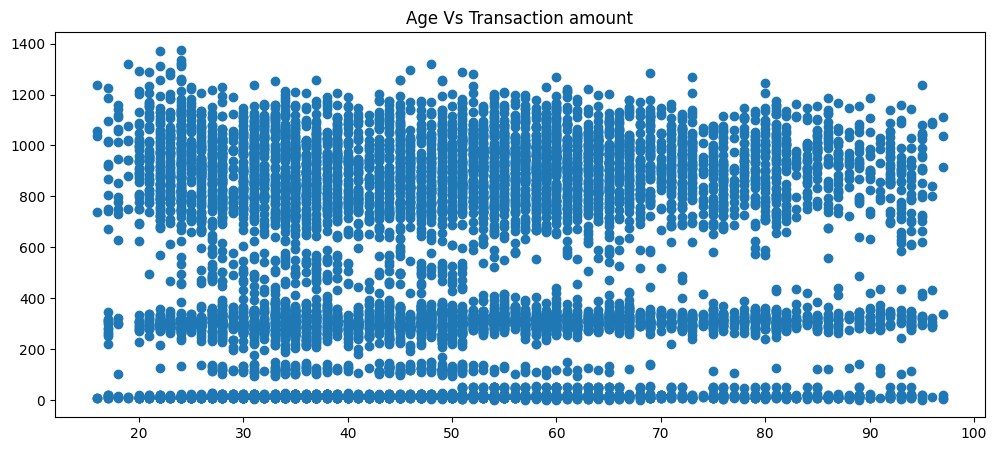

In [28]:
# visualize Age Vs fraudulent transaction amounts
plt.figure(figsize = (12,5))
plt.title('Age Vs Transaction amount')
plt.scatter(df[df['is_fraud'] == 1]['cust_age'],df[df['is_fraud'] == 1]['amt'])
plt.show()

`Inferences:` There's no specific pattern, let's bucket the age column and see the trend towards transaction amount.

In [29]:
# let's bucket the age column
df['cust_age_groups'] = df['cust_age'].apply(lambda x: 'below 10' if x<10 else ('10-20' if x>=10 and x<20 else ('20-30' if x>=20 and x<30 else('30-40' if x>=30 and x<40 else('40-50' if x>=40 and x<50 else('50-60' if x>=50 and x<60 else('60-70' if x>=60 and x<70 else ('70-80' if x>=70 and x<80 else 'Above 80'))))))))

# check
df.head()

trans_date_trans_time            cc_num                            merchant   
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann  \
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender   
0       misc_net    4.97   Jennifer    Banks      F  \
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...   
0                561 Perry Cove  Moravian Falls  ...  \
1  43039 Riley Greens Suite 393          Orient  ...   
2      594 White Dale Suite 530      Malad City  ...   
3   9443 Cynthia Court Apt. 038         Boulder  ...   
4              408 Bradley Rest        Doe Hill  ...   

                                 job        dob   
0          Psychologist, counselling 1988-03-09  \
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long   
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315  \
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_year_month  cust_age  cust_age_groups  
0        0          2019-01        33            30-40  
1        0          2019-01        43            40-50  
2        0          2019-01        59            50-60  
3        0          2019-01        54            50-60  
4        0          2019-01        35            30-40  

[5 rows x 25 columns]

In [30]:
# now let's see which customer age group was more prone towards the number of fraudulent transactions
age_piv = pd.pivot_table(data = df,
                         index = 'cust_age_groups',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')

# check
age_piv

is_fraud              0     1
cust_age_groups              
10-20             19662    72
20-30            240278  1299
30-40            431724  1870
40-50            419342  1642
50-60            294902  1832
60-70            211150  1373
70-80            115033   714
Above 80         110652   849

<Axes: title={'center': 'Age group vulnerability'}, xlabel='Age groups', ylabel='No. of transactions'>

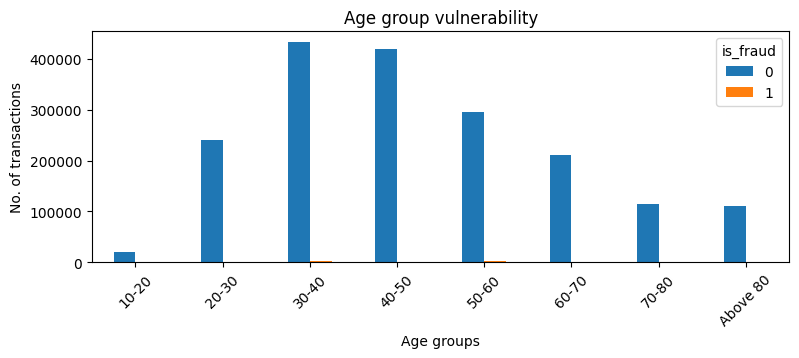

In [31]:
age_piv.plot(kind = 'bar', title = 'Age group vulnerability', xlabel = 'Age groups',ylabel = 'No. of transactions',figsize = (9,3),rot = 45 )

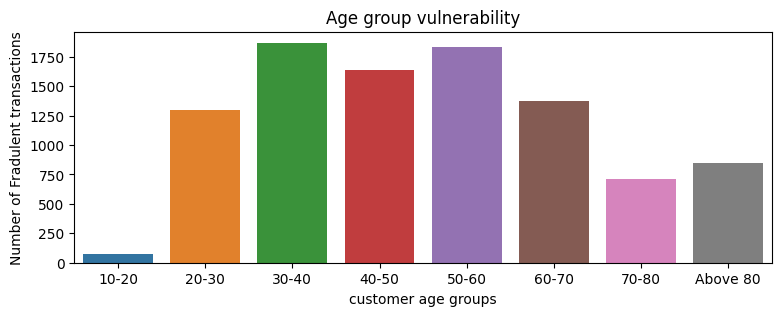

In [32]:
# let's see only fraudlent transactions 
plt.figure(figsize = (9,3))
plt.title('Age group vulnerability')
sns.barplot(data = age_piv, x = age_piv.index, y = age_piv[1].values )
plt.xlabel('customer age groups')
plt.ylabel('Number of Fradulent transactions')
plt.show()

`Inferences:`
Customers who are in the 30-40 age group are more vulnerable to the number of fradulent transactions.

Let's find how much it costed for the bank on an average for each age group in the case of fradulent transactions.

In [33]:
age_piv_2 = pd.pivot_table(data = df,
                           index = 'cust_age_groups',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
age_piv_2

is_fraud                 0           1
cust_age_groups                       
10-20            62.804052  570.907083
20-30            65.090333  547.980169
30-40            71.807532  501.161610
40-50            72.071064  458.982582
50-60            65.087352  551.289754
60-70            62.254365  571.760291
70-80            62.767527  581.812213
Above 80         63.316478  550.361013

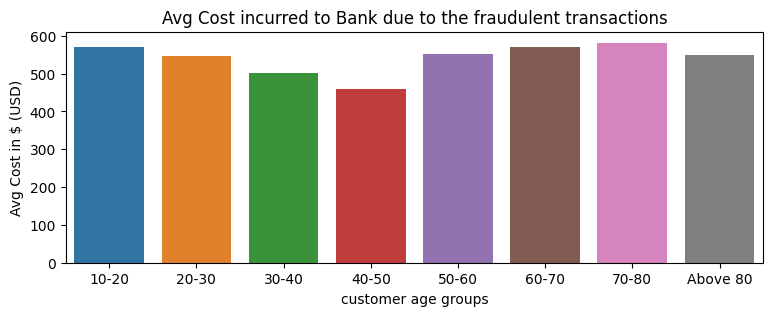

In [34]:
# let's visualize only the fraudlent transactions 
plt.figure(figsize = (9,3))
plt.title('Avg Cost incurred to Bank due to the fraudulent transactions')
sns.barplot(data = age_piv_2, x = age_piv_2.index, y = age_piv_2[1].values )
plt.xlabel('customer age groups')
plt.ylabel('Avg Cost in $ (USD)')
plt.show()

`Inferences:` 
Average cost to banks is highest for the customers who belong to `70-80` age group which is `$581.81`, followed by `60-70` and `10-20` age groups.

In [35]:
# deep dive into gender
age_gen_piv = pd.pivot_table(data = df,
                           index = ['cust_age_groups','gender'],
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)

# check
age_gen_piv

is_fraud                        0           1
cust_age_groups gender                       
10-20           F       62.810493  462.360000
                M       62.798893  657.744750
20-30           F       66.296307  507.903902
                M       63.808292  599.881060
30-40           F       71.160408  416.308351
                M       72.772864  584.753779
40-50           F       71.632860  360.021517
                M       72.614785  553.928520
50-60           F       66.886574  522.047746
                M       63.224855  573.657919
60-70           F       61.881839  573.675787
                M       62.653632  569.371408
70-80           F       62.008964  578.499973
                M       63.565175  585.256943
Above 80        F       63.620022  576.027386
                M       62.824387  516.652044

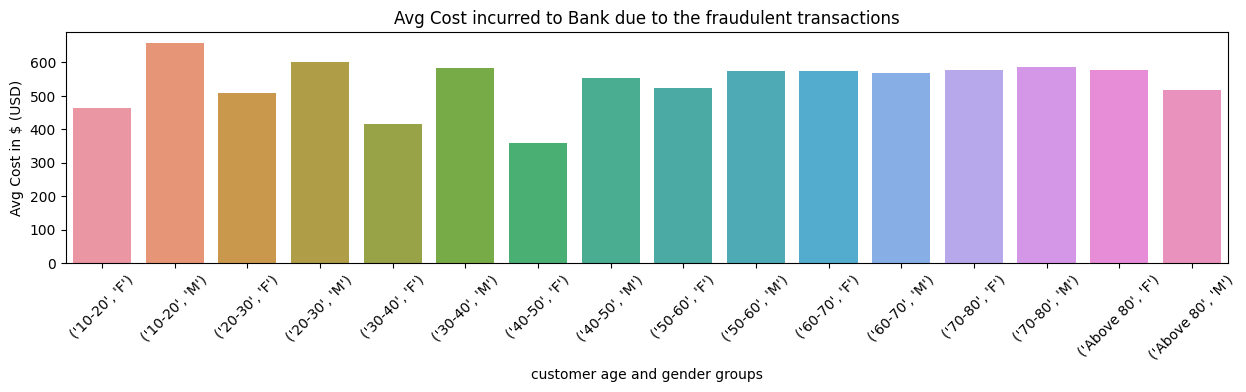

In [36]:
plt.figure(figsize= (15,3))
plt.title('Avg Cost incurred to Bank due to the fraudulent transactions')
sns.barplot(data = age_gen_piv, x = age_gen_piv.index.values, y = age_gen_piv[1])
plt.xticks(rotation = 45)
plt.xlabel('customer age and gender groups')
plt.ylabel('Avg Cost in $ (USD)')
plt.show()

`Inferences:` Banks average compensation is high for the males belonging to age group `10-20` which is $657.74. Except `60-70` and `Above 80` in all the other age groups, males are dominating more in terms of average compensation received compared to their female counterparts.

#### Analysis w.r.t. Customers Job categories 

In [37]:
# see all the customer job categories in the data
df['job'].value_counts()

job
Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: count, Length: 497, dtype: int64

Is there any relationship between Customer's professional information and the fraudulent transactions?

In [38]:
job_txn_piv = pd.pivot_table(data = df,
                         index = 'job',
                         columns = 'is_fraud',
                         values = 'trans_num',
                         aggfunc = 'count')


job_txn_piv.sort_values(by = 1, ascending = False, inplace = True)

In [39]:
# check the top 10 job categories of the customers which are more vulnerable towards fradulent transactions
job_txn_piv[:10]

is_fraud                                     0     1
job                                                 
Quantity surveyor                       8011.0  69.0
Naval architect                        12368.0  66.0
Materials engineer                     11649.0  62.0
Audiological scientist                  8743.0  58.0
Senior tax professional/tax inspector   5820.0  57.0
Trading standards officer               6555.0  56.0
Podiatrist                              9471.0  54.0
Film/video editor                      13846.0  52.0
Exhibition designer                    13116.0  51.0
Colour technologist                     5095.0  51.0

In [40]:
# avg cost incurred to bank due to fraudulent transactions w.r.t. each customer job category
job_txn_piv_2 = pd.pivot_table(data = df,
                               index = 'job',
                               columns = 'is_fraud',
                               values= 'amt',
                               aggfunc = np.mean)

# check
job_txn_piv_2

is_fraud                                      0           1
job                                                        
Academic librarian                    59.978709  640.192727
Accountant, chartered                       NaN  485.706364
Accountant, chartered certified       64.498041  669.404762
Accountant, chartered public finance  54.398289  521.846667
Accounting technician                 73.695373  605.632727
...                                         ...         ...
Water engineer                        70.660723  283.579231
Water quality scientist               63.824663  685.065714
Web designer                          57.169168  632.483889
Wellsite geologist                    62.657864  471.677813
Writer                                84.970124  343.938000

[497 rows x 2 columns]

In [41]:
# visualizing the top 10 job categories from high avg cost
job_txn_piv_2.sort_values(by = 1, ascending = False, inplace = True)

# check
job_txn_piv_2[:10]

is_fraud                             0           1
job                                               
Health promotion specialist  65.084065  920.257778
Ship broker                        NaN  874.505714
Community education officer  59.453640  869.980000
Clinical psychologist        49.461961  864.783750
Hydrologist                  69.746725  818.023889
Commissioning editor         64.621841  804.376667
Medical physicist            61.950005  801.131429
Hospital pharmacist          61.867750  776.057500
Plant breeder/geneticist     77.992390  773.039000
Catering manager             61.638505  763.103750

`Inferences:`Average cost incurred is highest for those customers who are Health promotion specialists. It is $920.25

#### Top states having high average cost incurred to bank

In [42]:
state_piv = pd.pivot_table(data = df,
                           index = 'state',
                           columns = 'is_fraud',
                           values = 'amt',
                           aggfunc = np.mean)
# check
state_piv

is_fraud          0           1
state                          
AK        61.955064  604.397800
AL        62.867098  536.228417
AR        73.682327  501.256564
AZ        73.458862  507.085156
CA        71.178889  512.286020
CO        75.201913  516.973652
CT        61.771970  513.672321
DC        72.488092  525.161290
DE              NaN  514.493333
FL        70.725626  519.902844
GA        67.053148  545.465000
HI        56.634123  630.719375
IA        63.116801  496.745071
ID        73.158513  528.548788
IL        67.182131  506.479753
IN        66.575316  575.877972
KS        67.263900  531.535337
KY        64.193129  571.675225
LA        72.813821  523.638673
MA        59.383266  578.328736
MD        61.324751  510.855025
ME        60.426518  559.035075
MI        69.040325  530.988495
MN        66.692768  530.481786
MO        66.001094  501.203359
MS        64.705121  559.618817
MT        70.018185  497.648841
NC        75.397992  474.586103
ND        63.475503  576.273810
NE        62.863369  553.208657
NH        72.286827  603.708734
NJ        64.487794  573.686211
NM        58.534736  583.447934
NV        52.837865  527.520851
NY        68.590563  541.500438
OH        69.892046  533.334556
OK        64.400822  505.650550
OR        66.254663  522.942284
PA        69.525766  537.469021
RI        56.716205  732.984000
SC        61.104524  470.131271
SD        67.726253  532.826848
TN        70.441162  527.502264
TX        68.603384  537.359476
UT        62.102395  413.518525
VA        67.336259  525.852601
VT        78.258114  617.669444
WA        71.450015  471.314921
WI        66.675551  570.825526
WV        68.412208  522.755616
WY        73.789131  492.094538

In [43]:
state_piv.sort_values(by = 1, ascending = False)

is_fraud          0           1
state                          
RI        56.716205  732.984000
HI        56.634123  630.719375
VT        78.258114  617.669444
AK        61.955064  604.397800
NH        72.286827  603.708734
NM        58.534736  583.447934
MA        59.383266  578.328736
ND        63.475503  576.273810
IN        66.575316  575.877972
NJ        64.487794  573.686211
KY        64.193129  571.675225
WI        66.675551  570.825526
MS        64.705121  559.618817
ME        60.426518  559.035075
NE        62.863369  553.208657
GA        67.053148  545.465000
NY        68.590563  541.500438
PA        69.525766  537.469021
TX        68.603384  537.359476
AL        62.867098  536.228417
OH        69.892046  533.334556
SD        67.726253  532.826848
KS        67.263900  531.535337
MI        69.040325  530.988495
MN        66.692768  530.481786
ID        73.158513  528.548788
NV        52.837865  527.520851
TN        70.441162  527.502264
VA        67.336259  525.852601
DC        72.488092  525.161290
LA        72.813821  523.638673
OR        66.254663  522.942284
WV        68.412208  522.755616
FL        70.725626  519.902844
CO        75.201913  516.973652
DE              NaN  514.493333
CT        61.771970  513.672321
CA        71.178889  512.286020
MD        61.324751  510.855025
AZ        73.458862  507.085156
IL        67.182131  506.479753
OK        64.400822  505.650550
AR        73.682327  501.256564
MO        66.001094  501.203359
MT        70.018185  497.648841
IA        63.116801  496.745071
WY        73.789131  492.094538
NC        75.397992  474.586103
WA        71.450015  471.314921
SC        61.104524  470.131271
UT        62.102395  413.518525

`Inferences:` Average cost per month incurred to bank is highest for those customers who belong to `Rhode Island` state, which is $732.98.

#### How city population varies w.r.t. the Fraudulent transaction amount ?

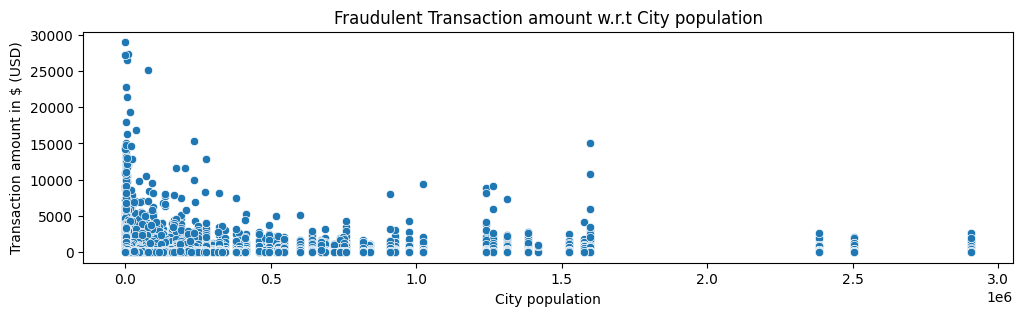

In [44]:
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t City population')
sns.scatterplot(data = df[df['is_fraud'] == 1], x = df['city_pop'], y = df['amt'])
plt.xlabel('City population')
plt.ylabel('Transaction amount in $ (USD)')
plt.show()

`Inferences:` Cities which are least populated are more vulnerable to the occurance of the fraudulent transactions.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

#### Top cities which are having high avg cost incurred to bank

In [46]:
# deriving a column containing city and its respective state
df['city-state'] = df['city']+'-'+df['state']

# check
df['city-state']

0          Moravian Falls-NC
1                  Orient-WA
2              Malad City-ID
3                 Boulder-MT
4                Doe Hill-VA
                 ...        
1852389             Luray-MO
1852390      Lake Jackson-TX
1852391           Burbank-WA
1852392              Mesa-ID
1852393            Edmond-OK
Name: city-state, Length: 1852394, dtype: object

In [47]:
# pivoting
city_piv = pd.pivot_table(data = df,
                          index = 'city-state',
                          columns = 'is_fraud',
                          values = 'amt',
                          aggfunc = np.mean)

# check
city_piv

is_fraud                              0           1
city-state                                         
Achille-OK                    50.401444  411.865385
Acworth-NH                    93.952545  709.354615
Adams-WI                      59.655901  676.559167
Afton-MI                      62.704056  565.707143
Afton-MN                      72.495744  445.716667
...                                 ...         ...
Woods Cross-UT                94.437603         NaN
Woodville-AL                  51.893661  219.465000
Yellowstone National Park-WY  58.350726  648.406667
Zaleski-OH                    93.205474  575.994167
Zavalla-TX                    68.232777  550.120833

[940 rows x 2 columns]

In [48]:
# orderding the cost incurred due to fraudulent transactions in descending order
city_piv.sort_values(by = 1, ascending = False, inplace = True)

# check the top 10 cities
city_piv[:10]

is_fraud                   0           1
city-state                              
De Lancey-NY       66.360867  926.156667
Monmouth Beach-NJ  65.084065  920.257778
North East-PA            NaN  918.425556
Arcadia-MI         59.333280  899.408571
Schaefferstown-PA  93.592899  897.211111
Thida-AR           71.254839  888.572500
Harrodsburg-IN     58.898636  884.250000
Oakford-IL         63.514107  878.527500
Karns City-PA            NaN  874.505714
Fordoche-LA        59.453640  869.980000

`Inferences:` 
- Average cost per month incurred to bank is highest for those customers who belong to `De Lancey` city in `Newyork` state, which is `$926.15`.
- Cities North East and Karns City, both belonging to Pennsylvania state have recorded only the Fraudulent transactions.  

#### Let's plot on the map and see the pattern across various cities.

In [49]:
# installing plotly
!pip install plotly

In [50]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
    lon = df[df['is_fraud'] == 1]['long'],  
    lat = df[df['is_fraud'] == 1]['lat'],   
    text = df[df['is_fraud'] == 1]['city-state'],     
    marker = dict(
        size = df[df['is_fraud'] == 1]['amt'],  
        sizemode = 'area',
        sizeref = 10,
        sizemin = 8,
        color = df[df['is_fraud'] == 1]['amt'], 
        colorbar = dict(
            title = 'Fraduluent Transaction amount across various cities'
        ),
        colorscale = 'Viridis',
        reversescale = True,
        opacity = 0.7,
        line = dict(
            width = 0.5,
            color = 'rgb(40,40,40)'
        ),
        cmin = 0
    )
))

fig.update_layout(
    title = 'Cities with Fraudulent transaction amount',
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitcolor = 'rgb(255, 255, 255)',
        countrycolor = 'rgb(255, 255, 255)',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)',
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'equirectangular',
            scale = 5
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [df[df['is_fraud'] == 1]['long'].min() - 5, df[df['is_fraud'] == 1]['long'].max() + 5]  # Adjust the range accordingly
        ),
        lataxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [df[df['is_fraud'] == 1]['lat'].min() - 5, df[df['is_fraud'] == 1]['lat'].max() + 5]  # Adjust the range accordingly
        )
    )
)

fig.show()


`Inferences:` As we see, the concentration of Fraudulent transactions is more in Eastern USA.

#### Top merchant categories which are targeted while performing fraudulent transactions in terms of total transaction amount

In [51]:
df[df['is_fraud'] == 1].groupby('category')['amt'].sum().sort_values(ascending = False)

category
shopping_net      2214847.64
misc_net           944009.71
shopping_pos       928132.34
grocery_pos        695664.62
entertainment      147399.96
misc_pos            68494.84
home                68231.96
food_dining         24739.16
gas_transport        9442.53
personal_care        7571.96
kids_pets            5619.53
health_fitness       3751.36
grocery_net          2108.21
travel               1399.47
Name: amt, dtype: float64

`Inferences:` High value fraudulent transactions happened for the merchant category `shopping_net` which means online shopping.

#### How is the geographical distance between customer location to merchant location varies with respect to the fradulent transaction amount

In [52]:
# function to determine distance between two coordinates
# link to this function: - https://www.geeksforgeeks.org/program-distance-two-points-earth/
from math import radians, cos, sin, asin, sqrt
def distance(df, lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    df['lon1'] = df[lon1].apply(lambda x: radians(x))
    df['lon2'] = df[lon2].apply(lambda x: radians(x))
    df['lat1'] = df[lat1].apply(lambda x: radians(x))
    df['lat2'] = df[lat2].apply(lambda x: radians(x))
      
    # Haversine formula
    df['dlon'] = df['lon2'] - df['lon1']
    df['dlat'] = df['lat2'] - df['lat1']

    df['a'] = df['dlat'].apply(lambda x: sin(x/2)**2) + df['lat1'].apply(lambda x: cos(x))*df['lat2'].apply(lambda x: cos(x))*df['dlon'].apply(lambda x: sin(x/2)**2)
 

    df['c'] = df['a'].apply(lambda x: 2*asin(sqrt(x)))
    
    # Radius of earth in kilometers = 6371. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(df['c'] * r)

In [53]:
df['distance_bw_cust_merch_in_miles'] = distance(df,lat1 = 'lat', lat2 = 'merch_lat', lon1 = 'long', lon2 = 'merch_long')

# check
df['distance_bw_cust_merch_in_miles']

0          48.804266
1          18.759907
2          67.189336
3          59.407205
4          48.157978
             ...    
1852389    47.828510
1852390    62.140073
1852391    50.146570
1852392    32.868294
1852393    44.979732
Name: distance_bw_cust_merch_in_miles, Length: 1852394, dtype: float64

In [54]:
# check 2
df.head()

trans_date_trans_time            cc_num                            merchant   
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann  \
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender   
0       misc_net    4.97   Jennifer    Banks      F  \
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...         city-state   
0                561 Perry Cove  Moravian Falls  ...  Moravian Falls-NC  \
1  43039 Riley Greens Suite 393          Orient  ...          Orient-WA   
2      594 White Dale Suite 530      Malad City  ...      Malad City-ID   
3   9443 Cynthia Court Apt. 038         Boulder  ...         Boulder-MT   
4              408 Bradley Rest        Doe Hill  ...        Doe Hill-VA   

       lon1      lon2      lat1      lat2      dlon      dlat         a   
0 -1.416825 -1.432013  0.629694  0.628516 -0.015188 -0.001178  0.000038  \
1 -2.063162 -2.062743  0.853253  0.857987  0.000420  0.004734  0.000006   
2 -1.959342 -1.957465  0.736194  0.753122  0.001877  0.016928  0.000072   
3 -1.956755 -1.964561  0.806876  0.820904 -0.007806  0.014028  0.000056   
4 -1.386889 -1.372395  0.670568  0.675006  0.014494  0.004438  0.000037   

          c  distance_bw_cust_merch_in_miles  
0  0.012337                        48.804266  
1  0.004742                        18.759907  
2  0.016984                        67.189336  
3  0.015017                        59.407205  
4  0.012173                        48.157978  

[5 rows x 35 columns]

In [55]:
# let's bucket the distance between customer and merchant
df['distance_cust_merch'] = df['distance_bw_cust_merch_in_miles'].apply(lambda x: '< 20' if x>0 and x<=20 else('20-40' if x>20 and x<=40 else('40-60' if x>40 and x<=60 else('60-80' if x>60 and x<=80 else '> 80'))))

# check
df[['distance_bw_cust_merch_in_miles','distance_cust_merch']]

distance_bw_cust_merch_in_miles distance_cust_merch
0                              48.804266               40-60
1                              18.759907                < 20
2                              67.189336               60-80
3                              59.407205               40-60
4                              48.157978               40-60
...                                  ...                 ...
1852389                        47.828510               40-60
1852390                        62.140073               60-80
1852391                        50.146570               40-60
1852392                        32.868294               20-40
1852393                        44.979732               40-60

[1852394 rows x 2 columns]

In [56]:
# let's see how w.r.t distance transaction amount varies
dis_piv = pd.pivot_table(data = df,
                         index = 'distance_cust_merch',
                         columns = 'is_fraud',
                         values = 'amt',
                         aggfunc = np.mean)

# check
dis_piv

is_fraud                     0           1
distance_cust_merch                       
20-40                67.980100  518.545797
40-60                67.466160  536.074159
60-80                67.490977  529.616239
< 20                 67.798937  544.268404
> 80                 68.601749  540.452455

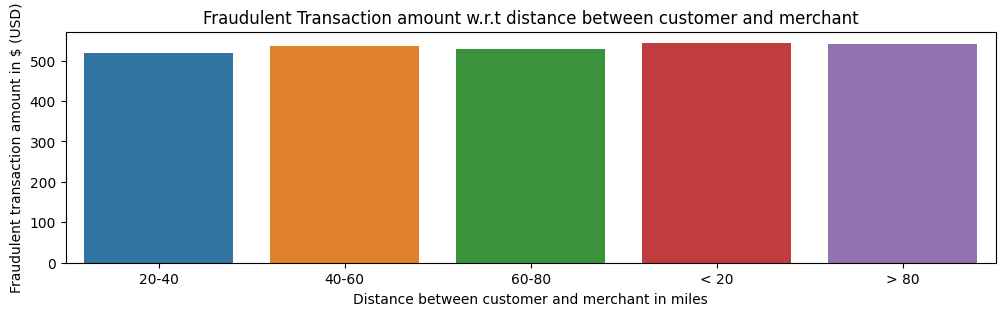

In [57]:
# now let's see how fraudulent transaction amount varies w.r.t. the distance between customer and merchant location
plt.figure(figsize = (12,3))
plt.title('Fraudulent Transaction amount w.r.t distance between customer and merchant')
sns.barplot(data = dis_piv, x = dis_piv.index, y = dis_piv[1])
plt.xlabel('Distance between customer and merchant in miles')
plt.ylabel('Fraudulent transaction amount in $ (USD)')
plt.show()

`Inferences:` High average cost incurred to bank is from those customers who are just less than 20 miles away from their merchants. But still we are unable to identify the specific pattern w.r.t distance.

#### How an average transaction amount varies w.r.t each month

In [58]:
time_series_piv = pd.pivot_table(data = df,
                                 index = 'trans_year_month',
                                 columns = 'is_fraud',
                                 values = 'amt',
                                 aggfunc = np.mean)

# check
time_series_piv

is_fraud                  0           1
trans_year_month                       
2019-01           67.244077  517.352530
2019-02           67.490955  530.079458
2019-03           67.999841  481.047753
2019-04           67.345681  537.413005
2019-05           67.250211  516.051740
2019-06           68.349000  503.402825
2019-07           67.876023  570.095438
2019-08           67.182560  533.903482
2019-09           67.377040  520.754474
2019-10           67.251225  567.708634
2019-11           67.438852  516.256366
2019-12           68.222098  566.144493
2020-01           67.114081  532.347988
2020-02           67.137160  547.470565
2020-03           68.061017  527.229955
2020-04           68.165728  503.887351
2020-05           67.150895  545.021594
2020-06           67.931695  542.836702
2020-07           67.575657  494.297477
2020-08           67.063895  503.097422
2020-09           68.045887  596.179382
2020-10           67.765501  509.304609
2020-11           67.394777  521.027857
2020-12           67.935054  547.049147

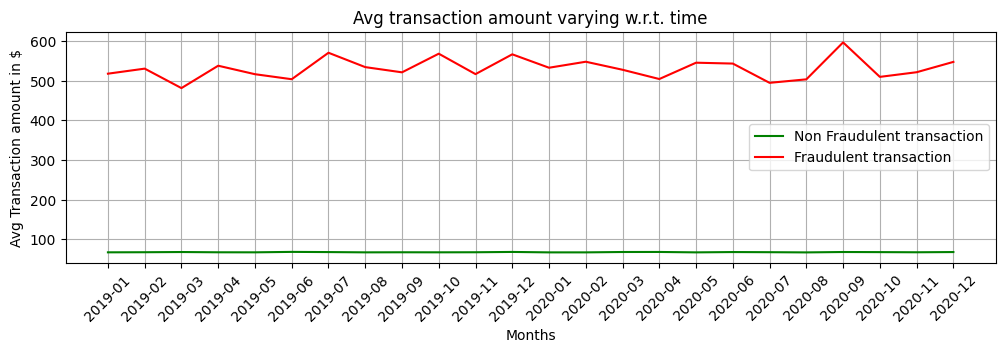

In [59]:
# let's visualize this
plt.figure(figsize = (12,3))
plt.title('Avg transaction amount varying w.r.t. time')
plt.plot(time_series_piv.index, time_series_piv[0], color = 'green', label = 'Non Fraudulent transaction')
plt.plot(time_series_piv.index, time_series_piv[1], color = 'red', label = 'Fraudulent transaction')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Avg Transaction amount in $')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

`Inferences:` It is irregular and there's no pattern w.r.t. time

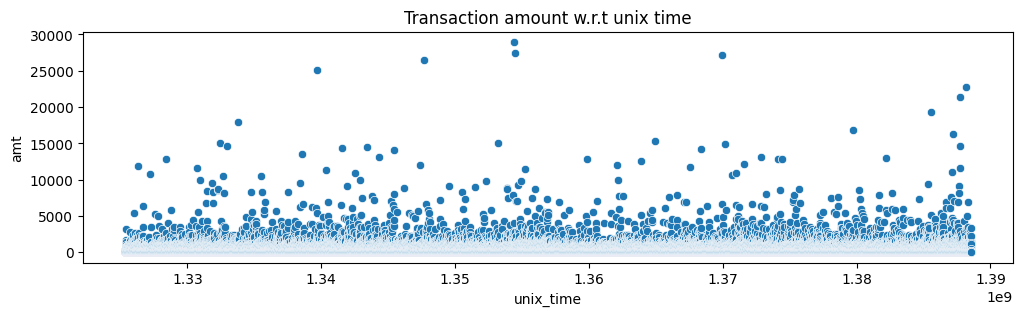

In [60]:
# how transaction amount varies w.r.t unix time
plt.figure(figsize = (12,3))
plt.title('Transaction amount w.r.t unix time')
sns.scatterplot(data = df, x = df['unix_time'],y = df['amt'])
plt.show()

`Inferences:` There's no specific patter w.r.t. the unix time.

In [61]:
# deriving hours from the transaction date time column
df['trans_hour'] = df['trans_date_trans_time'].dt.time.apply(lambda x: str(x)[:2])

# check
df['trans_hour']

0          00
1          00
2          00
3          00
4          00
           ..
1852389    23
1852390    23
1852391    23
1852392    23
1852393    23
Name: trans_hour, Length: 1852394, dtype: object

#### Let's figure out usually at what hour of the time, the frequency of fradulent transactions is high

In [62]:
time_piv = pd.pivot_table(data = df,
                          index = 'trans_hour',
                          columns = ['is_fraud'],
                          values = 'trans_num',
                          aggfunc = 'count')

# check
time_piv

is_fraud        0     1
trans_hour             
00          59832   823
01          60503   827
02          60003   793
03          60165   803
04          59877    61
05          60008    80
06          60352    54
07          60229    72
08          60439    59
09          60170    61
10          60268    52
11          60111    59
12          93210    84
13          93398    94
14          92989   100
15          93339   100
16          94192    97
17          93420    94
18          93941   111
19          93328   105
20          92983    98
21          93637   101
22          92889  2481
23          93460  2442

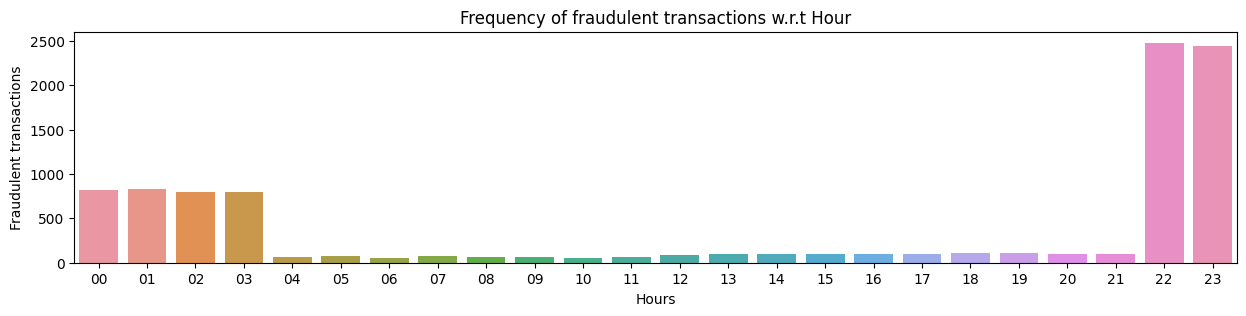

In [63]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Frequency of fraudulent transactions w.r.t Hour')
sns.barplot(data = time_piv, x = time_piv.index, y = time_piv[1])
plt.xlabel('Hours')
plt.ylabel('Fraudulent transactions')
plt.show()

`Inferences:` In the two years span, high number of transactions happened during night time, i.e., from 10 PM to 3 AM.

#### Let's figure out at what hour of the time, average cost incurred to bank is high

In [64]:
time_piv_amt = pd.pivot_table(data = df,
                              index = 'trans_hour',
                              columns = ['is_fraud'],
                              values = 'amt',
                              aggfunc = np.mean)

# check
time_piv_amt

is_fraud            0           1
trans_hour                       
00          74.881872  344.455808
01          75.574026  358.350387
02          76.118122  360.258689
03          75.577875  353.571245
04          75.716290  312.402131
05          75.598080  310.636125
06          75.660059  323.170000
07          75.632552  369.261111
08          75.895848  333.571017
09          75.241207  309.417213
10          75.055262  398.803077
11          76.278935  364.838305
12          61.923404  630.164405
13          62.769892  614.954574
14          62.785011  709.079000
15          62.416057  596.806500
16          62.868125  598.389175
17          62.851634  610.842447
18          62.415806  633.548559
19          61.766866  618.130857
20          62.548337  687.224592
21          62.367769  661.967228
22          63.130881  651.564659
23          62.509424  639.003481

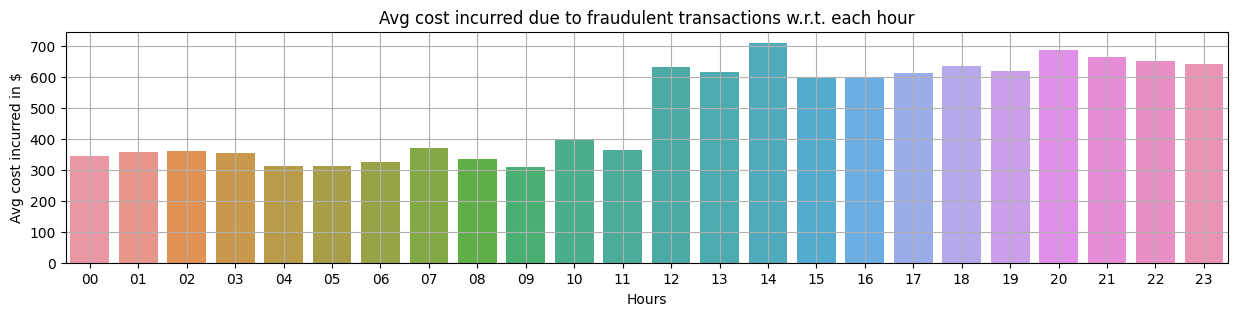

In [65]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Avg cost incurred due to fraudulent transactions w.r.t. each hour')
sns.barplot(data = time_piv_amt, x = time_piv_amt.index, y = time_piv_amt[1])
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Avg cost incurred in $')
plt.show()

`Inferences:` Average cost incurred to bank is highest during 2 PM, i.e., $ 709.07. 

It is in the range between $(600-750) from 12 PM to 11 PM.

### For model building, let's remove all the redundant columns from the dataframe

In [66]:
# all Columns
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_year_month', 'cust_age',
       'cust_age_groups', 'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch', 'trans_hour'],
      dtype='object')

In [67]:
# columns to be dropped, except trans_num, which we will be dealing further
drop_col = ['trans_date_trans_time', 'cc_num', 'merchant','first', 'last', 'street', 'city', 'state', 'lat',
       'long','dob', 'unix_time', 'merch_lat',
       'merch_long', 'trans_year_month', 'cust_age',
       'city-state', 'lon1', 'lon2', 'lat1', 'lat2', 'dlon',
       'dlat', 'a', 'c', 'distance_bw_cust_merch_in_miles',
       'distance_cust_merch']

# dropping above columns from the dataframe
df.drop(drop_col, axis = 1, inplace = True)

# check
df.head()

category     amt gender    zip  city_pop   
0       misc_net    4.97      F  28654      3495  \
1    grocery_pos  107.23      F  99160       149   
2  entertainment  220.11      M  83252      4154   
3  gas_transport   45.00      M  59632      1939   
4       misc_pos   41.96      M  24433        99   

                                 job                         trans_num   
0          Psychologist, counselling  0b242abb623afc578575680df30655b9  \
1  Special educational needs teacher  1f76529f8574734946361c461b024d99   
2        Nature conservation officer  a1a22d70485983eac12b5b88dad1cf95   
3                    Patent attorney  6b849c168bdad6f867558c3793159a81   
4     Dance movement psychotherapist  a41d7549acf90789359a9aa5346dcb46   

   is_fraud cust_age_groups trans_hour  
0         0           30-40         00  
1         0           40-50         00  
2         0           50-60         00  
3         0           50-60         00  
4         0           30-40         00

#### Let's convert the categorical columns (except gender) into numerical columns based on the avg fraudulent txn amount w.r.t. each category

In [68]:
# let's label encode age column w.r.t the avg fraudulent txn amount
age_piv_2.sort_values(by = 1, ascending = True, inplace = True)

age_piv_2

is_fraud                 0           1
cust_age_groups                       
40-50            72.071064  458.982582
30-40            71.807532  501.161610
20-30            65.090333  547.980169
Above 80         63.316478  550.361013
50-60            65.087352  551.289754
10-20            62.804052  570.907083
60-70            62.254365  571.760291
70-80            62.767527  581.812213

In [69]:
# get dictionary
age_dic = {k:v for (k,v) in zip(age_piv_2.index.values, age_piv_2.reset_index().index.values)}

# check
age_dic

{'40-50': 0,
 '30-40': 1,
 '20-30': 2,
 'Above 80': 3,
 '50-60': 4,
 '10-20': 5,
 '60-70': 6,
 '70-80': 7}

In [70]:
# label encoding the age groups column
df['cust_age_groups'] = df['cust_age_groups'].map(age_dic)

# check
df['cust_age_groups']

0          1
1          0
2          4
3          4
4          1
          ..
1852389    4
1852390    2
1852391    0
1852392    4
1852393    2
Name: cust_age_groups, Length: 1852394, dtype: int64

In [71]:
# now let's encode merchant category
merch_cat = df[df['is_fraud'] == 1].groupby('category')['amt'].mean().sort_values(ascending = True)

# check
merch_cat

category
travel              8.970962
grocery_net        12.046914
gas_transport      12.231256
kids_pets          18.485296
health_fitness     20.277622
personal_care      26.110207
food_dining       120.678829
misc_pos          212.716894
home              257.479094
grocery_pos       312.237262
entertainment     504.794384
misc_net          798.654577
shopping_pos      878.913201
shopping_net      998.128725
Name: amt, dtype: float64

In [72]:
merch_cat_dic = {k:v for (k,v) in zip(merch_cat.index.values,merch_cat.reset_index().index.values)}

# check
merch_cat_dic

{'travel': 0,
 'grocery_net': 1,
 'gas_transport': 2,
 'kids_pets': 3,
 'health_fitness': 4,
 'personal_care': 5,
 'food_dining': 6,
 'misc_pos': 7,
 'home': 8,
 'grocery_pos': 9,
 'entertainment': 10,
 'misc_net': 11,
 'shopping_pos': 12,
 'shopping_net': 13}

In [73]:
# encoding the merchant_category column
df['category'] = df['category'].map(merch_cat_dic)

# check
df['category']

0          11
1           9
2          10
3           2
4           7
           ..
1852389     4
1852390     3
1852391     3
1852392     0
1852393    10
Name: category, Length: 1852394, dtype: int64

In [74]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

# check
job_txn_piv_2

is_fraud                                 0           1
job                                                   
Theatre manager                  87.874390  125.860000
Geophysicist/field seismologist  85.637705  160.656000
Information officer                    NaN  168.566250
Pathologist                      91.689204  168.640000
Designer, furniture              90.657536  168.992000
...                                    ...         ...
Ship broker                            NaN  874.505714
Health promotion specialist      65.084065  920.257778
Engineer, communications         53.216566         NaN
Engineer, drilling               66.918497         NaN
Stage manager                    66.131877         NaN

[497 rows x 2 columns]

In [75]:
job_txn_piv_2[1].fillna(0, inplace = True)

# check
job_txn_piv_2

is_fraud                                 0           1
job                                                   
Theatre manager                  87.874390  125.860000
Geophysicist/field seismologist  85.637705  160.656000
Information officer                    NaN  168.566250
Pathologist                      91.689204  168.640000
Designer, furniture              90.657536  168.992000
...                                    ...         ...
Ship broker                            NaN  874.505714
Health promotion specialist      65.084065  920.257778
Engineer, communications         53.216566    0.000000
Engineer, drilling               66.918497    0.000000
Stage manager                    66.131877    0.000000

[497 rows x 2 columns]

In [76]:
job_txn_piv_2.sort_values(by = 1, ascending = True, inplace = True)

job_txn_piv_2

is_fraud                                 0           1
job                                                   
Stage manager                    66.131877    0.000000
Engineer, communications         53.216566    0.000000
Engineer, drilling               66.918497    0.000000
Theatre manager                  87.874390  125.860000
Geophysicist/field seismologist  85.637705  160.656000
...                                    ...         ...
Hydrologist                      69.746725  818.023889
Clinical psychologist            49.461961  864.783750
Community education officer      59.453640  869.980000
Ship broker                            NaN  874.505714
Health promotion specialist      65.084065  920.257778

[497 rows x 2 columns]

In [77]:
# job categories
job_cat_dic = {k:v for (k,v) in zip(job_txn_piv_2.index.values, job_txn_piv_2.reset_index().index.values)}

# check
job_cat_dic

{'Stage manager': 0,
 'Engineer, communications': 1,
 'Engineer, drilling': 2,
 'Theatre manager': 3,
 'Geophysicist/field seismologist': 4,
 'Information officer': 5,
 'Pathologist': 6,
 'Designer, furniture': 7,
 'Statistician': 8,
 'Contractor': 9,
 'English as a foreign language teacher': 10,
 'Retail banker': 11,
 'Merchandiser, retail': 12,
 'Chartered legal executive (England and Wales)': 13,
 'Teacher, English as a foreign language': 14,
 'Designer, exhibition/display': 15,
 'Logistics and distribution manager': 16,
 'Planning and development surveyor': 17,
 'Dispensing optician': 18,
 'Training and development officer': 19,
 'Investment banker, operational': 20,
 'Public house manager': 21,
 'Research scientist (life sciences)': 22,
 'Pension scheme manager': 23,
 'Water engineer': 24,
 'Surveyor, rural practice': 25,
 'Geneticist, molecular': 26,
 'Hydrogeologist': 27,
 'Phytotherapist': 28,
 'Insurance underwriter': 29,
 'Arboriculturist': 30,
 'Research officer, trade union

In [78]:
# label encoding the job column
df['job'] = df['job'].map(job_cat_dic)

# check
df['job']

0          118
1           48
2           67
3          303
4          296
          ... 
1852389    422
1852390    196
1852391    151
1852392    394
1852393    197
Name: job, Length: 1852394, dtype: int64

In [79]:
# check
df.head()

category     amt gender    zip  city_pop  job   
0        11    4.97      F  28654      3495  118  \
1         9  107.23      F  99160       149   48   
2        10  220.11      M  83252      4154   67   
3         2   45.00      M  59632      1939  303   
4         7   41.96      M  24433        99  296   

                          trans_num  is_fraud  cust_age_groups trans_hour  
0  0b242abb623afc578575680df30655b9         0                1         00  
1  1f76529f8574734946361c461b024d99         0                0         00  
2  a1a22d70485983eac12b5b88dad1cf95         0                4         00  
3  6b849c168bdad6f867558c3793159a81         0                4         00  
4  a41d7549acf90789359a9aa5346dcb46         0                1         00

In [80]:
# check 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   category         int64  
 1   amt              float64
 2   gender           object 
 3   zip              int64  
 4   city_pop         int64  
 5   job              int64  
 6   trans_num        object 
 7   is_fraud         int64  
 8   cust_age_groups  int64  
 9   trans_hour       object 
dtypes: float64(1), int64(6), object(3)
memory usage: 141.3+ MB


In [81]:
# let's convert trans_hour into numerical format
df['trans_hour'] = df['trans_hour'].astype('int')

# check
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1852389    23
1852390    23
1852391    23
1852392    23
1852393    23
Name: trans_hour, Length: 1852394, dtype: int32

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   category         int64  
 1   amt              float64
 2   gender           object 
 3   zip              int64  
 4   city_pop         int64  
 5   job              int64  
 6   trans_num        object 
 7   is_fraud         int64  
 8   cust_age_groups  int64  
 9   trans_hour       int32  
dtypes: float64(1), int32(1), int64(6), object(2)
memory usage: 134.3+ MB


In [83]:
# create dummies for 'gender' column
df = pd.get_dummies(data  = df, columns = ['gender'], drop_first = True, dtype = 'int')

# check
df.head()

category     amt    zip  city_pop  job                         trans_num   
0        11    4.97  28654      3495  118  0b242abb623afc578575680df30655b9  \
1         9  107.23  99160       149   48  1f76529f8574734946361c461b024d99   
2        10  220.11  83252      4154   67  a1a22d70485983eac12b5b88dad1cf95   
3         2   45.00  59632      1939  303  6b849c168bdad6f867558c3793159a81   
4         7   41.96  24433        99  296  a41d7549acf90789359a9aa5346dcb46   

   is_fraud  cust_age_groups  trans_hour  gender_M  
0         0                1           0         0  
1         0                0           0         0  
2         0                4           0         1  
3         0                4           0         1  
4         0                1           0         1

# 3. Train-Validation split

In [84]:
# visualizing class imbalance
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [85]:
# let's split the dataset into train and test sets. 
# Use stratified approach as to preserve the same class distribution in both train and test sets 
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.33, random_state=42, stratify = df['is_fraud'])

# check
print(train.shape)
print(test.shape)

(1241103, 10)
(611291, 10)


In [86]:
# check
train.head()

category    amt    zip  city_pop  job   
1487269        12   8.37  78214   1595797  463  \
1838910         4   2.01  33813    237282  229   
349622         13   4.54  76248     95035  354   
475792          2  37.50  77327     34153  399   
1668680        11  23.20  75858        43  244   

                                trans_num  is_fraud  cust_age_groups   
1487269  1a3b2c30799a30f89d00defe95d27efd         0                2  \
1838910  17afa7441d6f1986334db9ef8d6eaedb         0                6   
349622   d6aecc9b07468dfe6dc3b78328f5278a         0                1   
475792   e24f550edd520f1e60d82086d94d497d         0                2   
1668680  055f41732062c4383412aa029ed6861d         0                7   

         trans_hour  gender_M  
1487269          23         1  
1838910          21         1  
349622           12         1  
475792            8         0  
1668680           2         0

In [87]:
# check
test.head()

category     amt    zip  city_pop  job   
1762949         3   56.01   4616       824  385  \
349628          4  155.05  33040     32891  422   
1446560        11    2.87  14510      4895  432   
1271721         8   61.52  99323      3684  151   
1232136        12    5.72  33967    224256   87   

                                trans_num  is_fraud  cust_age_groups   
1762949  cc1e7d79b3cbfe19dbf78b20f44849aa         0                0  \
349628   8bf0eaaff6f87de82da4219e49c4593a         0                1   
1446560  3654dfe66398efbdf060ddc88f6f2f97         0                6   
1271721  728a99077629ec72f8add5c0562957a8         0                0   
1232136  da80eb4642fc047f226f6faa5efa0a1c         0                1   

         trans_hour  gender_M  
1762949          14         1  
349628           12         1  
1446560           5         0  
1271721          12         0  
1232136          14         0

In [88]:
# check class proportions in train and test datasets
print(train['is_fraud'].value_counts())
print(test['is_fraud'].value_counts())

is_fraud
0    1234637
1       6466
Name: count, dtype: int64
is_fraud
0    608106
1      3185
Name: count, dtype: int64


In [89]:
# storing the transaction numbers from both train and test data into separate dataframes respectively
txn_train = pd.DataFrame(train[['trans_num','amt']].values, columns = ['txn_num','amt'])
txn_test = pd.DataFrame(test[['trans_num','amt']].values, columns = ['txn_num','amt'])

# check
txn_train

txn_num     amt
0        1a3b2c30799a30f89d00defe95d27efd    8.37
1        17afa7441d6f1986334db9ef8d6eaedb    2.01
2        d6aecc9b07468dfe6dc3b78328f5278a    4.54
3        e24f550edd520f1e60d82086d94d497d    37.5
4        055f41732062c4383412aa029ed6861d    23.2
...                                   ...     ...
1241098  444d47d2786e8b0b345a486baa47f510   19.13
1241099  a041ad4ddb4532d9b6147b94259dd9ea   74.15
1241100  93c58684304726579f25df4d844e0c7c  116.07
1241101  8f00350564ae8d24c6a08d715325d0be    2.52
1241102  d829279094b33d778eb7ec2714f5fc2f    2.39

[1241103 rows x 2 columns]

In [90]:
# check 2
txn_test

txn_num     amt
0       cc1e7d79b3cbfe19dbf78b20f44849aa   56.01
1       8bf0eaaff6f87de82da4219e49c4593a  155.05
2       3654dfe66398efbdf060ddc88f6f2f97    2.87
3       728a99077629ec72f8add5c0562957a8   61.52
4       da80eb4642fc047f226f6faa5efa0a1c    5.72
...                                  ...     ...
611286  338aa875143b08d159cd44fdb76f4ffc    35.9
611287  e878b9d59e35bdce751bef5a29040346   86.18
611288  5a25fad9d2744927c5a1c59602e30bc2   28.85
611289  c7fca8fb5ffb1fc602e6ee409bfef0d4   57.78
611290  b68bd662ae11159e1ef5a0e99b7edbdf   20.99

[611291 rows x 2 columns]

In [91]:
# let's drop transaction number columns from both the training and testing data
train.drop('trans_num',axis = 1, inplace = True)
test.drop('trans_num',axis = 1, inplace = True)

In [92]:
# splitting data into dependent and independent features respectively
y_train = train['is_fraud']
X_train = train.drop('is_fraud',axis = 1)

y_test = test['is_fraud']
X_test = test.drop('is_fraud',axis = 1)

print('Shape of training data: ',(X_train.shape,y_train.shape))
print('Shape of testing data: ',(X_test.shape,y_test.shape))

Shape of training data:  ((1241103, 8), (1241103,))
Shape of testing data:  ((611291, 8), (611291,))


In [93]:
# let's delete all the reduntant data frames
del df_train
del df_test
del age_piv
del age_piv_2
del age_gen_piv
del job_txn_piv
del job_txn_piv_2
del state_piv
del city_piv
del time_series_piv

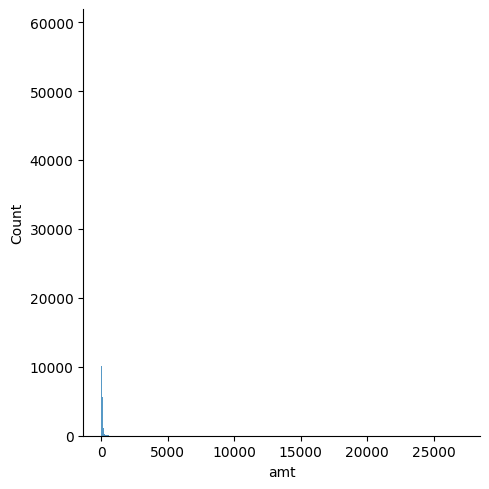

In [94]:
# let's see how the numerical columns are distributed
sns.displot(X_train['amt'])

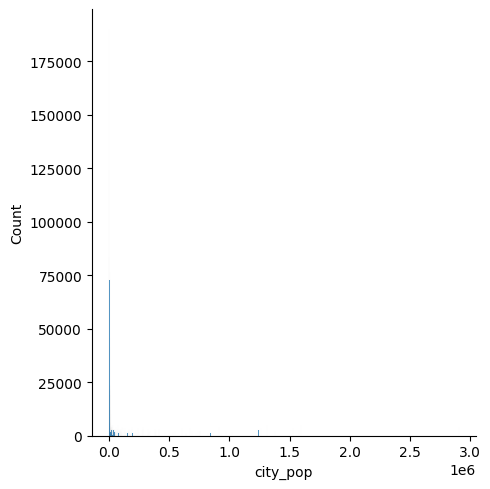

In [95]:
sns.displot(X_train['city_pop'])

In [96]:
# applying log transformations
X_train['amt'] = np.log(X_train['amt']+1)
X_train['city_pop'] = np.log(X_train['city_pop']+1)

X_test['amt'] = np.log(X_test['amt']+1)
X_test['city_pop'] = np.log(X_test['city_pop']+1)

C:\Users\srira\AppData\Local\Temp\ipykernel_16464\958870444.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='amt', ylabel='Density'>

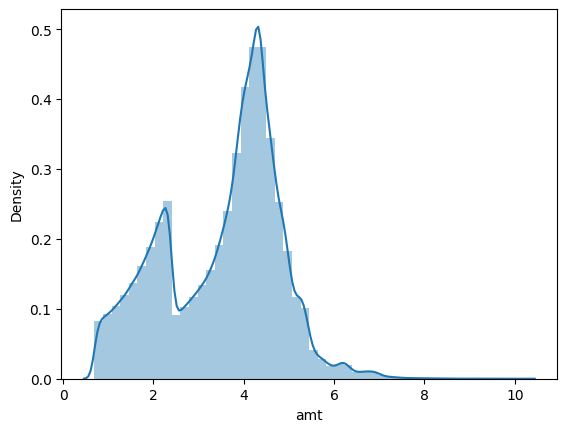

In [97]:
# Visualizing for train data
sns.distplot(X_train['amt'])

C:\Users\srira\AppData\Local\Temp\ipykernel_16464\3928423150.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='city_pop', ylabel='Density'>

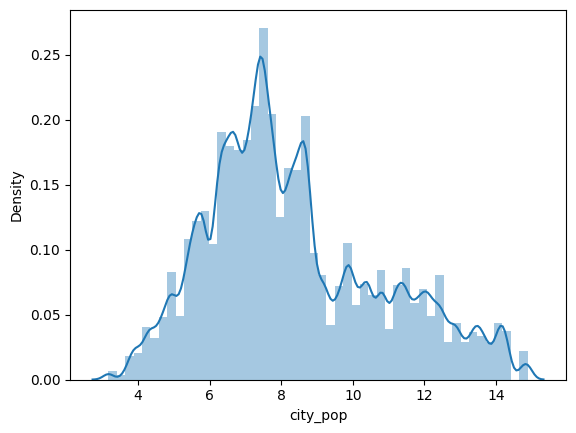

In [98]:
sns.distplot(X_train['city_pop'])

C:\Users\srira\AppData\Local\Temp\ipykernel_16464\2774985256.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='amt', ylabel='Density'>

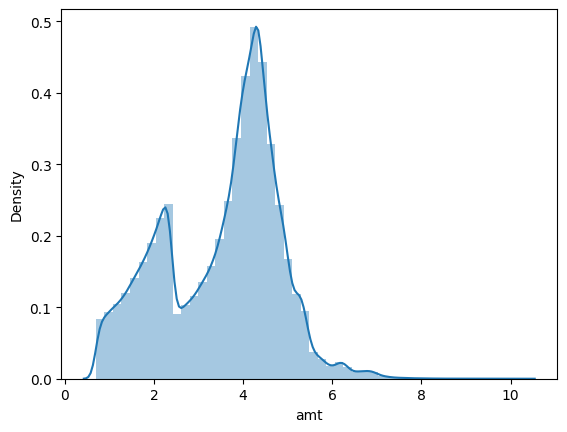

In [99]:
# visualizing for test data
sns.distplot(X_test['amt'])

C:\Users\srira\AppData\Local\Temp\ipykernel_16464\1814800478.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='city_pop', ylabel='Density'>

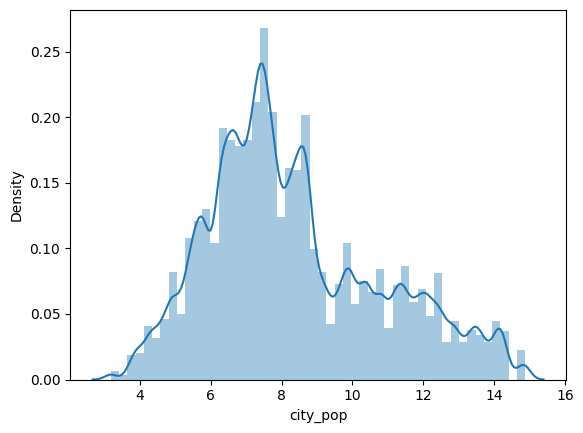

In [100]:
sns.distplot(X_test['city_pop'])

In [101]:
# saving the train and test datasets to disk
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv',index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv',index = False)

# 4. Model building and evaluation

## A) Logistic regression

In [102]:
# let's scale the variables using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [103]:
# scaling the training and testing data
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [104]:
# convert them into dataframes
X_train_sc = pd.DataFrame(data = X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(data = X_test_sc, columns = X_test.columns)

In [105]:
# check 1
X_train_sc.head()

category       amt       zip  city_pop       job  cust_age_groups   
0  1.338581 -1.005021  1.093022  2.419053  1.698021        -0.218573  \
1 -0.761233 -1.886985 -0.557904  1.641062 -0.084508         1.554004   
2  1.601058 -1.413175  1.019922  1.267554  0.867697        -0.661718   
3 -1.286186  0.092526  1.060041  0.849806  1.210491        -0.218573   
4  1.076105 -0.268086  1.005421 -1.866581  0.029756         1.997149   

   trans_hour  gender_M  
0    1.495558  1.099728  
1    1.202126  1.099728  
2   -0.118316  1.099728  
3   -0.705179 -0.909316  
4   -1.585474 -0.909316

In [106]:
# check 2
X_test_sc.head()

category       amt       zip  city_pop       job  cust_age_groups   
0 -1.023709  0.397421 -1.643512 -0.670049  1.103844        -1.104862  \
1 -0.761233  1.179488 -0.586646  0.834437  1.385697        -0.661718   
2  1.076105 -1.691797 -1.275631  0.056881  1.461874         1.554004   
3  0.288674  0.469077  1.877900 -0.059110 -0.678685        -1.104862   
4  1.338581 -1.263205 -0.552178  1.618015 -1.166214        -0.661718   

   trans_hour  gender_M  
0    0.175116  1.099728  
1   -0.118316  1.099728  
2   -1.145326 -0.909316  
3   -0.118316 -0.909316  
4    0.175116 -0.909316

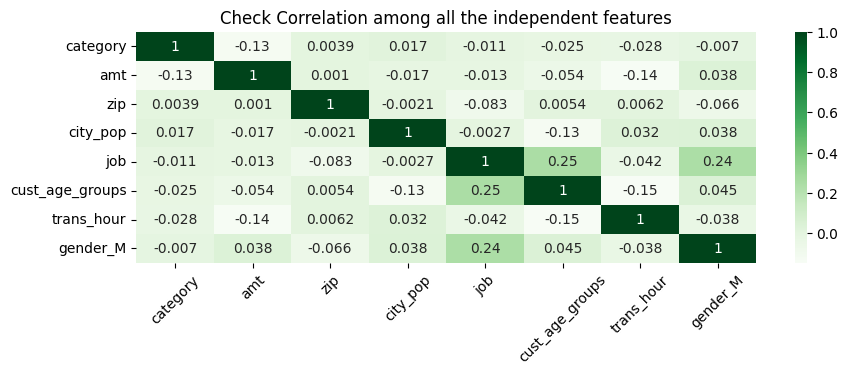

In [107]:
# check correlation among all the independent features in train data
plt.figure(figsize = (10,3))
plt.title("Check Correlation among all the independent features")
sns.heatmap(X_train_sc.corr(),annot = True, cmap = 'Greens')
plt.xticks(rotation = 45)
plt.show()


`Inferences:` `job` feature is correlated to `cust_age_groups` and `gender_M` features of about 25% and 24% respectively. Rest all features have very less correlation among themselves.

In [108]:
# let's build our first logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve

lr = LogisticRegression()

In [109]:
# fitting on the training data
lr.fit(X_train_sc,y_train)

# predictions on the training data
y_pred_train = lr.predict(X_train_sc)

# check
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
# predictions on the test data
y_pred_test = lr.predict(X_test_sc)

# check
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
# let's check the evaluation metrics, import confusion matrix
from sklearn.metrics import confusion_matrix

# for train data
## TN FP
## FN TP
print(confusion_matrix(y_train, y_pred_train))

[[1234379     258]
 [   6466       0]]


`Inferences:` Due to high class balance, we got 0 TPs

In [112]:
# roc_auc score
print(f'ROC_AUC score on train data is {roc_auc_score(y_train,y_pred_train)} and on test data is {roc_auc_score(y_test,y_pred_test)}')

ROC_AUC score on train data is 0.499895515847978 and on test data is 0.49992188861810277


In [113]:
# accuracy score
print(f'Accuracy on train data is {accuracy_score(y_train,y_pred_train)} and on test data is {accuracy_score(y_test,y_pred_test)}')

Accuracy on train data is 0.9945822385410397 and on test data is 0.9946343067377076


In [114]:
# let's get predicted probabilites for train data
y_pred_train_proba = lr.predict_proba(X_train_sc)

# check
y_pred_train_proba

array([[9.99489101e-01, 5.10899470e-04],
       [9.99926254e-01, 7.37463289e-05],
       [9.99838664e-01, 1.61335717e-04],
       ...,
       [9.93769602e-01, 6.23039789e-03],
       [9.99945530e-01, 5.44699389e-05],
       [9.99973679e-01, 2.63206639e-05]])

In [115]:
# let's get predicted probabilities for test data
y_pred_test_proba = lr.predict_proba(X_test_sc)

# check
y_pred_test_proba

array([[9.98428507e-01, 1.57149292e-03],
       [9.92984149e-01, 7.01585086e-03],
       [9.99894126e-01, 1.05873513e-04],
       ...,
       [9.99253881e-01, 7.46118574e-04],
       [9.97981857e-01, 2.01814313e-03],
       [9.99174398e-01, 8.25602172e-04]])

In [116]:
y_train_results = pd.DataFrame(y_pred_train_proba, columns = ['pred_not_fraud','pred_fraud'])

# check
y_train_results

pred_not_fraud  pred_fraud
0              0.999489    0.000511
1              0.999926    0.000074
2              0.999839    0.000161
3              0.999341    0.000659
4              0.998798    0.001202
...                 ...         ...
1241098        0.998950    0.001050
1241099        0.997517    0.002483
1241100        0.993770    0.006230
1241101        0.999946    0.000054
1241102        0.999974    0.000026

[1241103 rows x 2 columns]

In [117]:
y_train_results['y_train_actual'] = y_train.values

# check
y_train_results

pred_not_fraud  pred_fraud  y_train_actual
0              0.999489    0.000511               0
1              0.999926    0.000074               0
2              0.999839    0.000161               0
3              0.999341    0.000659               0
4              0.998798    0.001202               0
...                 ...         ...             ...
1241098        0.998950    0.001050               0
1241099        0.997517    0.002483               0
1241100        0.993770    0.006230               0
1241101        0.999946    0.000054               0
1241102        0.999974    0.000026               0

[1241103 rows x 3 columns]

In [118]:
y_test_results = pd.DataFrame(y_pred_test_proba, columns = ['pred_not_fraud','pred_fraud'])

# check
y_test_results

pred_not_fraud  pred_fraud
0             0.998429    0.001571
1             0.992984    0.007016
2             0.999894    0.000106
3             0.998106    0.001894
4             0.999836    0.000164
...                ...         ...
611286        0.998769    0.001231
611287        0.995870    0.004130
611288        0.999254    0.000746
611289        0.997982    0.002018
611290        0.999174    0.000826

[611291 rows x 2 columns]

In [119]:
y_test_results['y_test_actual'] = y_test.values

# check
y_test_results

pred_not_fraud  pred_fraud  y_test_actual
0             0.998429    0.001571              0
1             0.992984    0.007016              0
2             0.999894    0.000106              0
3             0.998106    0.001894              0
4             0.999836    0.000164              0
...                ...         ...            ...
611286        0.998769    0.001231              0
611287        0.995870    0.004130              0
611288        0.999254    0.000746              0
611289        0.997982    0.002018              0
611290        0.999174    0.000826              0

[611291 rows x 3 columns]

#### Let's find an optimal threshold point to classify whether it is a fraudulent transaction or not fraudulent transaction.

In [120]:
# Let's create columns with different probability cutoffs 
numbers = [0.0001,0.0003,0.0005,0.001,0.005,0.010,0.015,0.020,0.025,0.05,0.075,0.1,0.125,0.150,0.175,0.2,0.3,0.4]
for i in numbers:
    y_train_results[i]= y_train_results.pred_fraud.map(lambda x: 1 if x > i else 0)
y_train_results.head()

pred_not_fraud  pred_fraud  y_train_actual  0.0001  0.0003  0.0005  0.001   
0        0.999489    0.000511               0       1       1       1      0  \
1        0.999926    0.000074               0       0       0       0      0   
2        0.999839    0.000161               0       1       0       0      0   
3        0.999341    0.000659               0       1       1       1      0   
4        0.998798    0.001202               0       1       1       1      1   

   0.005  0.01  0.015  ...  0.025  0.05  0.075  0.1  0.125  0.15  0.175  0.2   
0      0     0      0  ...      0     0      0    0      0     0      0    0  \
1      0     0      0  ...      0     0      0    0      0     0      0    0   
2      0     0      0  ...      0     0      0    0      0     0      0    0   
3      0     0      0  ...      0     0      0    0      0     0      0    0   
4      0     0      0  ...      0     0      0    0      0     0      0    0   

   0.3  0.4  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0  

[5 rows x 21 columns]

In [121]:
# Now let's calculate recall scores for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','recall_score'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = confusion_matrix(y_train_results['y_train_actual'], y_train_results[i])
    total1=sum(sum(cm1))
    
    recall_score = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i, recall_score]
print(cutoff_df)

          prob  recall_score
0.0001  0.0001      0.963192
0.0003  0.0003      0.878441
0.0005  0.0005      0.823229
0.0010  0.0010      0.790288
0.0050  0.0050      0.769564
0.0100  0.0100      0.758274
0.0150  0.0150      0.745438
0.0200  0.0200      0.667801
0.0250  0.0250      0.614445
0.0500  0.0500      0.502938
0.0750  0.0750      0.449428
0.1000  0.1000      0.410300
0.1250  0.1250      0.383545
0.1500  0.1500      0.354779
0.1750  0.1750      0.312713
0.2000  0.2000      0.267863
0.3000  0.3000      0.069440
0.4000  0.4000      0.003712


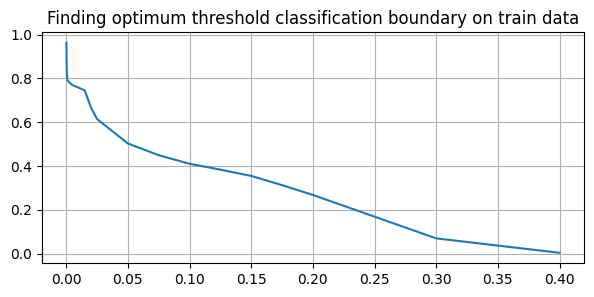

In [122]:
plt.figure(figsize = (7,3))
plt.title('Finding optimum threshold classification boundary on train data')
plt.plot(cutoff_df.prob, cutoff_df.recall_score)
plt.grid()
plt.show()

#### let's consider 0.0003 as an optimal threshold point

In [123]:
# applying on test data
y_test_results['pred_final'] = y_test_results['pred_fraud'].apply(lambda x: 1 if x>0.0003 else 0)

# check
y_test_results.head()

pred_not_fraud  pred_fraud  y_test_actual  pred_final
0        0.998429    0.001571              0           1
1        0.992984    0.007016              0           1
2        0.999894    0.000106              0           0
3        0.998106    0.001894              0           1
4        0.999836    0.000164              0           0

In [124]:
y_test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611291 entries, 0 to 611290
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pred_not_fraud  611291 non-null  float64
 1   pred_fraud      611291 non-null  float64
 2   y_test_actual   611291 non-null  int64  
 3   pred_final      611291 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 18.7 MB


In [125]:
# confusion matrix
## TN FP
## FN TP
cm = confusion_matrix(y_test_results['y_test_actual'],y_test_results['pred_final'] )
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(cm)

[[145141 462965]
 [   345   2840]]


In [126]:
# computing recall score
print(f'Recall score of the model on test data = {TP/(TP+FN)}')

Recall score of the model on test data = 0.8916797488226059


In [127]:
np.array(y_test_results['y_test_actual'])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### We have a matching recall scores between both training and testing data. Based on these predictions, let's do cost benefit analyis.

In [128]:
arr1 = y_train_results[['y_train_actual',0.0003]].values
arr2 = y_test_results[['y_test_actual','pred_final']].values

arr_f = np.concatenate((arr1, arr2), axis=0)

arr_f

array([[0, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [129]:
arr_f.shape

(1852394, 2)

In [130]:
lr_results = pd.DataFrame(arr_f, columns = ['is_f_actual','is_f_pred'])

# check
lr_results

is_f_actual  is_f_pred
0                  0          1
1                  0          0
2                  0          0
3                  0          1
4                  0          1
...              ...        ...
1852389            0          1
1852390            0          1
1852391            0          1
1852392            0          1
1852393            0          1

[1852394 rows x 2 columns]

In [131]:
txn_train

txn_num     amt
0        1a3b2c30799a30f89d00defe95d27efd    8.37
1        17afa7441d6f1986334db9ef8d6eaedb    2.01
2        d6aecc9b07468dfe6dc3b78328f5278a    4.54
3        e24f550edd520f1e60d82086d94d497d    37.5
4        055f41732062c4383412aa029ed6861d    23.2
...                                   ...     ...
1241098  444d47d2786e8b0b345a486baa47f510   19.13
1241099  a041ad4ddb4532d9b6147b94259dd9ea   74.15
1241100  93c58684304726579f25df4d844e0c7c  116.07
1241101  8f00350564ae8d24c6a08d715325d0be    2.52
1241102  d829279094b33d778eb7ec2714f5fc2f    2.39

[1241103 rows x 2 columns]

In [132]:
txn_test

txn_num     amt
0       cc1e7d79b3cbfe19dbf78b20f44849aa   56.01
1       8bf0eaaff6f87de82da4219e49c4593a  155.05
2       3654dfe66398efbdf060ddc88f6f2f97    2.87
3       728a99077629ec72f8add5c0562957a8   61.52
4       da80eb4642fc047f226f6faa5efa0a1c    5.72
...                                  ...     ...
611286  338aa875143b08d159cd44fdb76f4ffc    35.9
611287  e878b9d59e35bdce751bef5a29040346   86.18
611288  5a25fad9d2744927c5a1c59602e30bc2   28.85
611289  c7fca8fb5ffb1fc602e6ee409bfef0d4   57.78
611290  b68bd662ae11159e1ef5a0e99b7edbdf   20.99

[611291 rows x 2 columns]

In [133]:
# Adding transaction num and transaction amt columns
lr_results['txn_amt'] = pd.concat([txn_train,txn_test])['amt'].values
lr_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num'].values

# check
lr_results

is_f_actual  is_f_pred txn_amt                           txn_num
0                  0          1    8.37  1a3b2c30799a30f89d00defe95d27efd
1                  0          0    2.01  17afa7441d6f1986334db9ef8d6eaedb
2                  0          0    4.54  d6aecc9b07468dfe6dc3b78328f5278a
3                  0          1    37.5  e24f550edd520f1e60d82086d94d497d
4                  0          1    23.2  055f41732062c4383412aa029ed6861d
...              ...        ...     ...                               ...
1852389            0          1    35.9  338aa875143b08d159cd44fdb76f4ffc
1852390            0          1   86.18  e878b9d59e35bdce751bef5a29040346
1852391            0          1   28.85  5a25fad9d2744927c5a1c59602e30bc2
1852392            0          1   57.78  c7fca8fb5ffb1fc602e6ee409bfef0d4
1852393            0          1   20.99  b68bd662ae11159e1ef5a0e99b7edbdf

[1852394 rows x 4 columns]

#### Average number of transactions per month detected as fraudulent by the model (TF)

In [134]:
print('Average number of transactions per month detected as fraudulent by the model = ',len(lr_results[lr_results['is_f_pred'] == 1]['txn_num'].unique())/24)

Average number of transactions per month detected as fraudulent by the model =  58838.0


#### Total cost of providing customer support per month for fraudulent transactions detected by the model (TF * $1.5)

In [135]:
58838.0*1.5

88257.0

#### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [136]:
print('Average number of transactions per month that are fraudulent but not detected by the model = ',len(lr_results[(lr_results['is_f_actual'] == 1) & (lr_results['is_f_pred'] == 0)]['txn_num'].unique())/24)

Average number of transactions per month that are fraudulent but not detected by the model =  47.125


#### Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

In [137]:
print('Cost incurred due to fraudulent transactions left undetected by the model = $',47.125*530.6614)

Cost incurred due to fraudulent transactions left undetected by the model = $ 25007.418475


#### Cost incurred per month after the model is built and deployed (TP)

In [138]:
print(f'Cost incurred per month after the model is built and deployed = ${round(88257.0+25007.418475,2)}')

Cost incurred per month after the model is built and deployed = $113264.42


#### Final Savings = Cost incurred before model deployment - Cost incurred after model deployment

In [139]:
print('Final savings = $',213392.22-113264.42)

Final savings = $ 100127.8


In [140]:
# saving the model results into a dataframe
model_results = pd.DataFrame(columns = ['model','train_recall_score','test_recall_score','Cost saved by the model per month'])

model_results.loc[len(model_results)] = ['Logistic Regression model', 0.88, 0.89, '$100,127.8']

# check
model_results

model  train_recall_score  test_recall_score   
0  Logistic Regression model                0.88               0.89  \

  Cost saved by the model per month  
0                        $100,127.8

In [141]:
# save this data frame to disk as .csv file
model_results.to_csv('model_results.csv', index = False)

In [142]:
# saving the logistic regression model as well.
import joblib
joblib.dump(value = lr, filename = 'logistic_reg_model.pkl' )

['logistic_reg_model.pkl']

In [143]:
# check whether the model is saved properly
lr = joblib.load(r'models\logistic_reg_model.pkl')

In [144]:
lr.feature_names_in_

array(['category', 'amt', 'zip', 'city_pop', 'job', 'cust_age_groups',
       'trans_hour', 'gender_M'], dtype=object)

In [145]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Our Logistic regression model is successful in saving the costs per month upto $100,127.8

## B) XGBoost classifier

#### Let's see how XGBoost classifier model performs on the data. Here we are using original unscaled data.

In [146]:
# installing xgboost
# !pip install xgboost

In [147]:
# importing xgboost classifier 
from xgboost import XGBClassifier

# instantiating
xgb = XGBClassifier()

In [148]:
# let's check the train and test data frames
X_train.head()

category       amt    zip   city_pop  job  cust_age_groups   
1487269        12  2.237513  78214  14.282884  463                2  \
1838910         4  1.101940  33813  12.377009  229                6   
349622         13  1.711995  76248  11.462011  354                1   
475792          2  3.650658  77327  10.438635  399                2   
1668680        11  3.186353  75858   3.784190  244                7   

         trans_hour  gender_M  
1487269          23         1  
1838910          21         1  
349622           12         1  
475792            8         0  
1668680           2         0

In [149]:
# test dataframe
X_test.head()

category       amt    zip   city_pop  job  cust_age_groups   
1762949         3  4.043227   4616   6.715383  385                0  \
349628          4  5.050176  33040  10.400985  422                1   
1446560        11  1.353255  14510   8.496174  432                6   
1271721         8  4.135487  99323   8.212026  151                0   
1232136        12  1.905088  33967  12.320548   87                1   

         trans_hour  gender_M  
1762949          14         1  
349628           12         1  
1446560           5         0  
1271721          12         0  
1232136          14         0

In [150]:
y_train

1487269    0
1838910    0
349622     0
475792     0
1668680    0
          ..
352682     0
1266972    0
456117     0
1381545    0
466023     0
Name: is_fraud, Length: 1241103, dtype: int64

In [151]:
y_test

1762949    0
349628     0
1446560    0
1271721    0
1232136    0
          ..
1437316    0
330444     0
973543     0
450360     0
77815      0
Name: is_fraud, Length: 611291, dtype: int64

In [152]:
# choosing the best xgboost model by performing hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

params = {
          'learning_rate': [0.1,0.2,0.8,1],
          'max_depth': [2,4,6,8],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.5,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,100],
          'reg_lambda': [1,4,5,10,20,50,100,200]
          
         }

#Using Randomized search cv
rcv = RandomizedSearchCV(estimator = xgb,
                         param_distributions=params, 
                         n_iter = 5, 
                         scoring='recall', cv = 5, verbose=2, 
                         random_state=42, n_jobs=-1, return_train_score=True)

rcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.8, 1],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.5, 1]},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=2)

In [153]:
# best estimator
rcv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [154]:
# best params
rcv.best_params_

{'subsample': 0.09,
 'reg_lambda': 4,
 'reg_alpha': 4,
 'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [155]:
#best score
rcv.best_score_

0.6588319461229232

In [157]:
# creating best XGBoost model
xgb = rcv.best_estimator_

# fitting on train data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [158]:
# predictions on train data
y_pred_train = xgb.predict(X_train)

# predictions on test data
y_pred_test = xgb.predict(X_test)

In [159]:
# check
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
# check
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

#### Let's check the performance metrics

In [161]:
# confusion matrix on train data
cm2 = confusion_matrix(y_train,y_pred_train)

## TN FP
## FN TP

print(cm2)

[[1234022     615]
 [   2024    4442]]


In [162]:
print('Recall score of the XGBoost model on train data: ', cm2[1,1]/(cm2[1,1]+cm2[1,0]))

Recall score of the XGBoost model on train data:  0.68697803897309


In [163]:
# confusion matrix on test data
cm3 = confusion_matrix(y_test, y_pred_test)

## TN FP
## FN TP

print(cm3)

[[607808    298]
 [   980   2205]]


In [164]:
print('Recall score of the XGBoost model on test data: ', cm3[1,1]/(cm3[1,1]+cm3[1,0]))

Recall score of the XGBoost model on test data:  0.6923076923076923


In [165]:
X_train.columns

Index(['category', 'amt', 'zip', 'city_pop', 'job', 'cust_age_groups',
       'trans_hour', 'gender_M'],
      dtype='object')

In [166]:
xgb_feature_imp = pd.DataFrame(data = xgb.feature_importances_*100, index = X_train.columns, columns = ['feature_importance'])

xgb_feature_imp

feature_importance
category                  16.053530
amt                       31.465271
zip                        4.844905
city_pop                   5.992900
job                        4.649022
cust_age_groups            6.306863
trans_hour                25.922617
gender_M                   4.764898

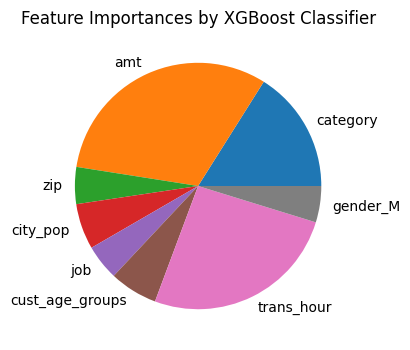

In [167]:
plt.figure(figsize = (10,4))
plt.title('Feature Importances by XGBoost Classifier')
plt.pie(x = xgb_feature_imp['feature_importance'], labels = xgb_feature_imp.index, )
plt.show()

`Inferences:` transaction amount,transaction hour and Merchant category are the top 3 features as per the importance.

#### Let's perform cost benefit analysis and see how much this model saved the cost incurred per month to banks

In [168]:
xgb_results = pd.DataFrame()

xgb_results['txn_num'] = pd.concat([txn_train,txn_test])['txn_num']
xgb_results['amt'] = pd.concat([txn_train,txn_test])['amt']
xgb_results['y_act'] = pd.concat([y_train,y_test])
xgb_results['y_pred'] = np.concatenate([y_pred_train,y_pred_test])

# check
xgb_results

txn_num    amt  y_act  y_pred
0       1a3b2c30799a30f89d00defe95d27efd   8.37      0       0
1       17afa7441d6f1986334db9ef8d6eaedb   2.01      0       0
2       d6aecc9b07468dfe6dc3b78328f5278a   4.54      0       0
3       e24f550edd520f1e60d82086d94d497d   37.5      0       0
4       055f41732062c4383412aa029ed6861d   23.2      0       0
...                                  ...    ...    ...     ...
611286  338aa875143b08d159cd44fdb76f4ffc   35.9      0       0
611287  e878b9d59e35bdce751bef5a29040346  86.18      0       0
611288  5a25fad9d2744927c5a1c59602e30bc2  28.85      0       0
611289  c7fca8fb5ffb1fc602e6ee409bfef0d4  57.78      0       0
611290  b68bd662ae11159e1ef5a0e99b7edbdf  20.99      0       0

[1852394 rows x 4 columns]

#### Average number of transactions per month detected as fraudulent by the model (TF)

In [169]:
print('Average number of transactions per month detected as fraudulent by the model: ',len(xgb_results[xgb_results['y_pred'] == 1]['txn_num'])/24)

Average number of transactions per month detected as fraudulent by the model:  315.0


#### Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)

In [171]:
315*1.5

472.5

#### Average number of transactions per month that are fraudulent but not detected by the model (FN)

In [172]:
print('Average number of transactions per month that are fraudulent but not detected by the model:',len(xgb_results[(xgb_results['y_act'] == 1) & (xgb_results['y_pred'] == 0)]['txn_num'])/24)

Average number of transactions per month that are fraudulent but not detected by the model: 446.9166666666667


#### Cost incurred due to fraudulent transactions left undetected by the model (FN*c)

In [173]:
446.916 * 530.66

237160.44455999997

##### Final savings = Cost incurred before - Cost incurred after

In [174]:
213392.22 - 237160.44

-23768.22